# Tensors

**0D tensors**: rank=0, scalars


In [ ]:
import numpy as np

In [ ]:
# 0d tensors
x = np.array(123)
x.ndim

0

**1D tensors**: rank=1, vectors


In [ ]:
#1d tensors
x = np.array([1,2,3])
x.ndim

1

**2D tensors**: rank=2, matrices


In [ ]:
#2d tensors
x = np.array([[1, 2, 3],
              [4, 5, 5]])
x.ndim

2

**3D tensors**: rank=3


In [ ]:
#3d tensors
x = np.array([[[1, 2, 3],
              [4, 5, 5]],
             [[1, 2, 3],
              [4, 5, 5]],
             [[1, 2, 3],
              [4, 5, 5]],
             [[1, 2, 3],
              [4, 5, 5]]])
x.ndim

3

Of course, this can continue indefinitely, up to generic **ND tensors**: rank=N, i.e. higher-dimensional tensors. 

**Summary of key attributes of a tensor**

A tensor is defined by 3 key attributes:

*   **# axes** (**rank**). 
*   **shape**. 
*   **data type**. 

Check all this on MNIST. In case not done earlier, load back the dataset:

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.ndim)

3


In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
print(train_images.dtype)

uint8


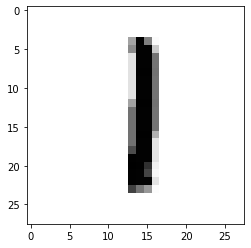

In [ ]:
digit = train_images[678]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[678]

1

Let's briefly manipulate tensors.



The example below selects digits #10 (included) to #100 (excluded) and puts them in an array of shape (90, 28, 28).

In [ ]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100, :, :] 
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice_bottomright = train_images[:, 14:, 14:]

In [ ]:
my_slice_middle = train_images[:, 7:-7, 7:-7]

**Concept of data batches**


In [ ]:
# batch_1 = train_images[:128]

# batch_2 = train_images[128:256]

# batch_N = train_images[128 * n:128 * (n + 1)]

# Tensor operations

See slides for intro.

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2                  # x is a 2D tensor
    x = x.copy()                              # avoid overwriting the input tensor

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2                  # x is a 2D tensor
    assert x.shape == y.shape                 # y same as x
    x = x.copy()                              # avoid overwriting the input tensor

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import numpy as np

In [ ]:
x = np.array([[1, 1],
              [1, 1]])
y = np.array([[2, 2],
              [2, 2]])

In [ ]:
z = x + y 
z

In [ ]:
%%time
z = x + y 
z

In [ ]:
# if you want to compute time a bit better..
import time

t0 = time.time()
for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)
print('Took: %.2f s' % (time.time() - t0))

Element-wise tensor operations.

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2             # x is a 2D tensor        
    assert len(y.shape) == 1             # y is a vector       
    assert x.shape[1] == y.shape[0]      # prepare for broadcasting
    x = x.copy()                         # avoid overwriting the input tensor

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
x = np.random.random((64, 3, 32, 10))        
y = np.random.random((32, 10))               
z = np.maximum(x, y)                      # z will have the same shape as x

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
z.shape

In [ ]:
# You can inspect the tensors, if interested.
# x
# y
# z

**Dot product**

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
z

In [ ]:
z.shape

**Dot product of 2 vectors**



In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1              # x is a 1D tensor (a vector)
    assert len(y.shape) == 1              # y is a 1D tensor (a vector)
    assert x.shape[0] == y.shape[0]

    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))

In [ ]:
z = np.dot(x, y)
z

In [ ]:
z = naive_vector_dot(x, y)
z

**Dot product of a matrix and a vector**



In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2               # x is a 2D tensor (i.e. a matrix) 
    assert len(y.shape) == 1               # y is a 1D tensor (i.e. a vector)
    assert x.shape[1] == y.shape[0]        # the 1st dimension of x must be the same as the 0th dimension of y

    z = np.zeros(x.shape[0])               # prepare z as a vector of 0s with same shape as y

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

Or just reuse this, that we wrote previously. It highlights the relationship between a matrix-vector product and a vector product.

In [ ]:
#def naive_matrix_vector_dot(x, y):
#    z = np.zeros(x.shape[0])
#    for i in range(x.shape[0]):
#        z[i] = naive_vector_dot(x[i, :], y)
#    return z

**Dot product of matrices**



In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2                  # x is a 2D tensor (i.e. matrix)
    assert len(y.shape) == 2                  # y is a 2D tensor (i.e. matrix)
    assert x.shape[1] == y.shape[0]           # the 1st dimension of x must be the same as the 0th dimension of y

    z = np.zeros((x.shape[0], y.shape[1]))    # prepare z as a matrix of 0s with the desired shape
    
    for i in range(x.shape[0]):               # iterate over the rows of x ..
        for j in range(y.shape[1]):           # .. and the columns of y
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

And so on, towards higher ranks.

**Tensor reshaping**




In [ ]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)

(3, 2)


In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

**Transposition**



In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)        # basically, x[i, :] becomes x[:, i]
print(x.shape)

(20, 300)
